# Radon Transform

The Radon transform is widely applied in tomography. See [wiki](https://en.wikipedia.org/wiki/Radon_transform) for details of the algorithm.

Here we use the [skimage](http://scikit-image.org/) package to quickly test if it's applicable to LArTPC reconstruction.

In this example, we first created a simple two-track 2D image

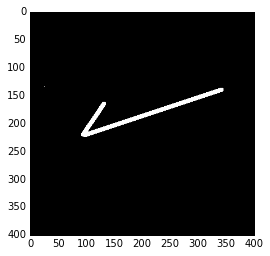

In [1]:
from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from skimage.io import imread
from skimage import data_dir
from skimage.transform import radon, rescale
from skimage.transform import iradon

#image = imread(data_dir + "/phantom.png", as_grey=True)
image = imread(data_dir + "/threetracks.png", as_grey=True)
image = rescale(image, scale=1.0)

plt.figure()
plt.imshow(image, cmap=plt.cm.Greys_r)

This image would represent a two-track event entirely parallel to the wire planes, a case very difficult to reconstruct.

We then project this 2D image to a few 1-D wire readout, and use the radon transformation to back project the reconstructed image. Then number of projections in DUNE is 3, here we step through more projections to see how the algorithm perfoms. The projection angle is evenly divided between 0 and 180 degrees.

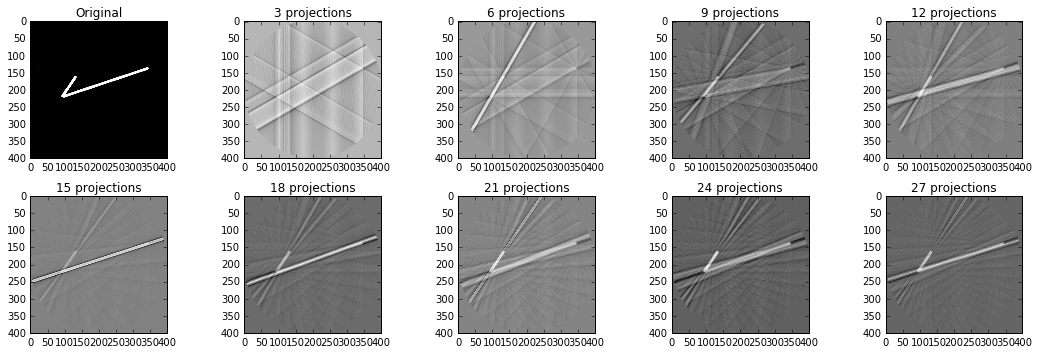

In [2]:
fig, ax = plt.subplots(2, 5, figsize=(3*5, 5))
ax = ax.ravel()

ax[0].set_title("Original")
ax[0].imshow(image, cmap=plt.cm.Greys_r)

theta_list = []
sinogram_list = []
reconstruction_fbp_list = []

STEP = 3

for i in range(3, STEP*10, STEP):
    theta = np.linspace(0., 180., i, endpoint=False)
    theta_list.append(theta)
    sinogram = radon(image, theta=theta, circle=True)
    sinogram_list.append(sinogram)
    reconstruction_fbp = iradon(sinogram, theta=theta, circle=True)
    reconstruction_fbp_list.append(reconstruction_fbp)
    
for i in range(1,10):
    ax[i].set_title("%i projections" % ( (i-1)*STEP+3,))
    ax[i].imshow(reconstruction_fbp_list[i-1], cmap=plt.cm.Greys_r)

plt.tight_layout()
plt.show()


We see that in the DUNE case (3 projections), it's very hard to idendify the tracks, if not possible at all. The two-track structure starts to show up at around 9 to 12 projections. The actual vertex starts to clean up at around 21+ projections.

Finally, let's see the "ultimate" case where we have 180 projection wire planes!

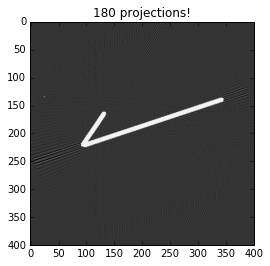

In [3]:
theta = np.linspace(0., 180., 180, endpoint=False)
sinogram = radon(image, theta=theta, circle=True)
reconstruction_fbp = iradon(sinogram, theta=theta, circle=True)

plt.figure()
plt.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
plt.title("180 projections!")

## Conclusion?

Radon transform is a very useful algothrim when number of projections is large. The speed of the algothrim is amazingly fast (~ms). When the number of projections is small (three for most LArTPCs), however, the reconstruction result is poor. Clearly, one would need more heuristics (hypotheses) to help the reconstruction. 